In [2]:
from re import X
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(Xtrain,ytrain),(Xtest,ytest) = keras.datasets.mnist.load_data()
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

# Data Scaling
Xtrain = Xtrain/Xtrain.max()
Xtest = Xtest/Xtest.max()

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


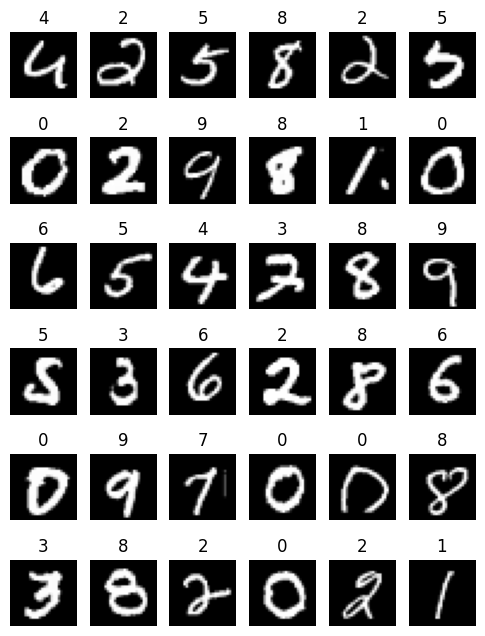

In [3]:
plt.figure(1,(6,8))
for i in range(1,37,1):
  temp= np.random.randint(0,60000)
  im = Xtrain[temp,:,:]
  label = ytrain[temp]
  plt.subplot(6,6,i)
  plt.imshow(im,cmap='gray')
  plt.title(label)
  plt.axis('off')
plt.show()

In [4]:
nn_model = keras.Sequential()

nn_model.add(keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2])))

nn_model.add(keras.layers.Dense(128,activation='relu'))
nn_model.add(keras.layers.Dense(256,activation='relu'))
nn_model.add(keras.layers.Dense(256,activation='relu'))

nn_model.add(keras.layers.Dense(len(np.unique(ytrain))))


nn_model.compile(optimizer='SGD',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
print(nn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 201866 (788.54 KB)
Trainable params: 201866 (788.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [5]:
history = nn_model.fit(Xtrain,ytrain,epochs=25)

Epoch 1/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6384 - accuracy: 0.8291
Epoch 2/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2752 - accuracy: 0.9196
Epoch 3/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2175 - accuracy: 0.9370
Epoch 4/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1805 - accuracy: 0.9471
Epoch 5/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1535 - accuracy: 0.9557
Epoch 6/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1340 - accuracy: 0.9604
Epoch 7/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1186 - accuracy: 0.9656
Epoch 8/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1061 - accuracy: 0.9692
Epoch 9/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0966 - accuracy: 0.9716
Epoch 10/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0

Text(0, 0.5, 'Accuracy')

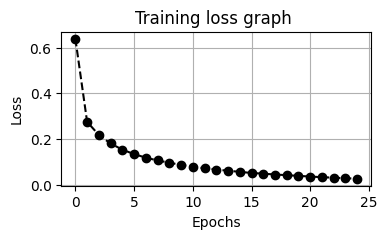

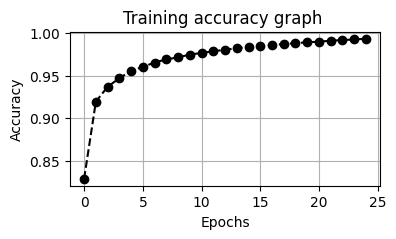

In [6]:

# visualize the training loss and acc
plt.figure(1,(4,2))

plt.plot(history.epoch,history.history['loss'],'--ko')
plt.grid('on')
plt.title('Training loss graph ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.figure(2,(4,2))
plt.plot(history.epoch,history.history['accuracy'],'--ko')
plt.grid('on')
plt.title('Training accuracy graph ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [7]:
# evaluate the test data
[loss, acc] = nn_model.evaluate(Xtest,ytest)
print('Loss:', loss)
print("Testing Accuracy:",acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0774 - accuracy: 0.9776
Loss: 0.07739873975515366
Testing Accuracy: 0.9775999784469604
